In [1]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\kater\AppData\Local\Temp\ipykernel_16360\1069530571.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
tipsData = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tipsData.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
## tail

tipsData.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [29]:
# info about dataset
tipsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [30]:
##  to check for missing values
## but zero is not a missing value for python
## when no value -python will put NAN
tipsData.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [12]:
##basic statistics

tipsData.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [31]:
## grouping by

tipsData.groupby(['day']).sum(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [32]:
tip_day_percentage = 100*tipsData.groupby(['day']).sum(numeric_only=True)['tip']/tipsData.groupby(['day']).sum(numeric_only=True)['total_bill']
tip_day_percentage= tip_day_percentage.to_frame('tip(%)').reset_index()

In [33]:
tip_day_percentage

,day,tip(%)
0,Fri,15.944519
1,Sat,14.642375
2,Sun,15.203791
3,Thur,15.673201


<Axes: xlabel='day'>

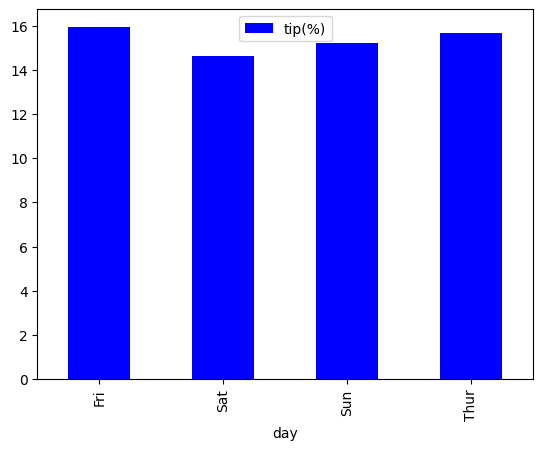

In [34]:
## creating chart

fig, ax = plt.subplots()
tip_day_percentage.plot(kind='bar', x='day', y='tip(%)', color = 'blue', ax=ax)

In [37]:
## Pie

days = pd.DataFrame(tipsData['day'].value_counts())
days = days.reset_index()


,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


In [42]:
days

,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


<Axes: ylabel='count'>

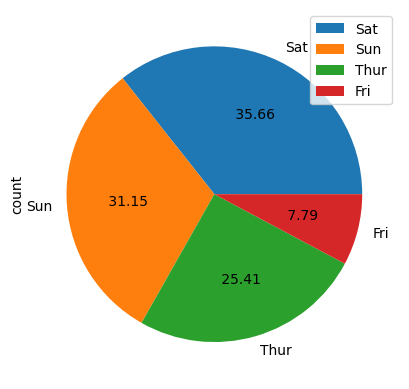

In [43]:
## Pie chart

fig, ax = plt.subplots()
days.plot(kind = 'pie', y='count', labels =days['day'], autopct =' %1.2f', ax=ax)

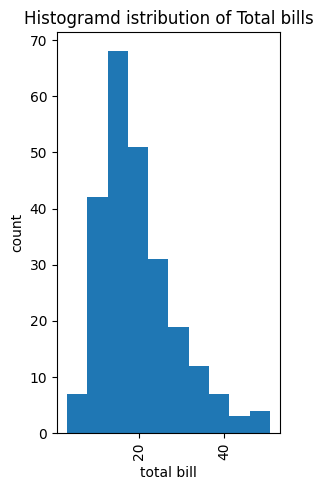

In [46]:
## Histogram

fig, ax =plt.subplots(figsize = (3,5))
ax.hist(tipsData['total_bill'])
plt.xticks(rotation = 'vertical')
plt.xlabel('total bill')
plt.ylabel('count')
plt.title('Histogramd istribution of Total bills')
fig.tight_layout()

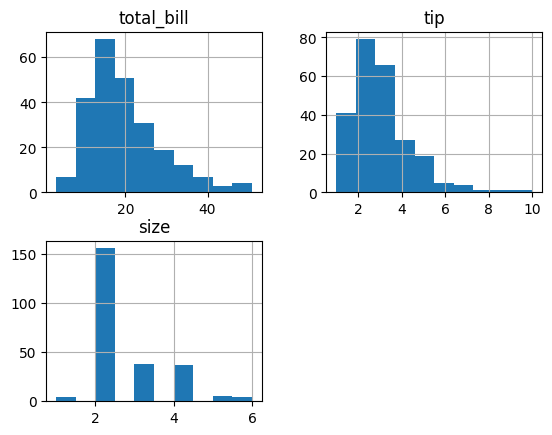

In [47]:
tipsData.hist()
fig.tight_layout()

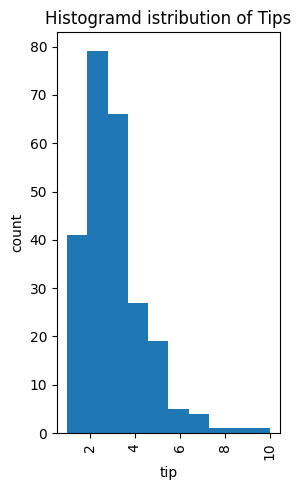

In [48]:
##Histogram for tip

fig, ax =plt.subplots(figsize = (3,5))
ax.hist(tipsData['tip'])
plt.xticks(rotation = 'vertical')
plt.xlabel('tip')
plt.ylabel('count')
plt.title('Histogramd istribution of Tips')
fig.tight_layout()

In [55]:
table = pd.pivot_table(tipsData, index = ['sex','smoker'], aggfunc = np.sum, values = 'total_bill')
table = pd.DataFrame(table, columns = ['total_bill'])
table

C:\Users\kater\AppData\Local\Temp\ipykernel_16360\2421711966.py:1: FutureWarning: The provided callable <function sum at 0x000001E9B84CAD40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(tipsData, index = ['sex','smoker'], aggfunc = np.sum, values = 'total_bill')


total_bill
sex    smoker            
Female No          977.68
       Yes         593.27
Male   No         1919.75
       Yes        1337.07

In [56]:
## correlation matrix

corr_mat = tipsData.corr(numeric_only=True)
corr_mat

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [59]:
import seaborn as sns 
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, annot = True)

ModuleNotFoundError: No module named 'seaborn'